In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


In [2]:
data = pd.read_csv('sales_data.csv')

print(data.head())

         Date  Sales  Profit Region  CustomerID   Product  Leads
0  2025-01-01    500      50  North           1  ProductA     25
1  2025-01-02    700     100  South           2  ProductA     35
2  2025-01-03    300      30   East           3  ProductB     15
3  2025-01-04    900     150   West           4  ProductC     45
4  2025-01-05    400      40  North           5  ProductD     20


In [3]:
total_revenue = data['Sales'].sum()

print(f"Total Revenue: ${total_revenue}")

Total Revenue: $20860


In [4]:
total_profit = data['Profit'].sum()

gross_profit_margin = (total_profit / total_revenue) * 100
print(f'Gross Profit Margin: {gross_profit_margin:.2f}%')

Gross Profit Margin: 15.09%


In [5]:
data['Sales Growth'] = data['Sales'].pct_change() * 100
print(data[['Date','Sales Growth']].tail())

          Date  Sales Growth
25  2025-01-26     68.333333
26  2025-01-27    -26.732673
27  2025-01-28    -10.810811
28  2025-01-29    -15.151515
29  2025-01-30     55.357143


In [6]:
total_orders = len(data)

average_order_value = total_revenue / total_orders
print(f'Average Order Value ${average_order_value:.2f}' )

Average Order Value $695.33


In [7]:
purchase_frequency = data.groupby('CustomerID')['Sales'].count().mean(    )
average_purchase_value = data.groupby('CustomerID')['Sales'].sum().mean()
customer_lifespan = 5


clv = average_purchase_value * purchase_frequency * customer_lifespan
print(f'Customer Lifetime Value: ${clv:.2f}')

Customer Lifetime Value: $3476.67


In [8]:
regional_sales = data.groupby('Region')['Sales'].sum()
print(regional_sales)

Region
East     3770
North    4430
South    6800
West     5860
Name: Sales, dtype: int64


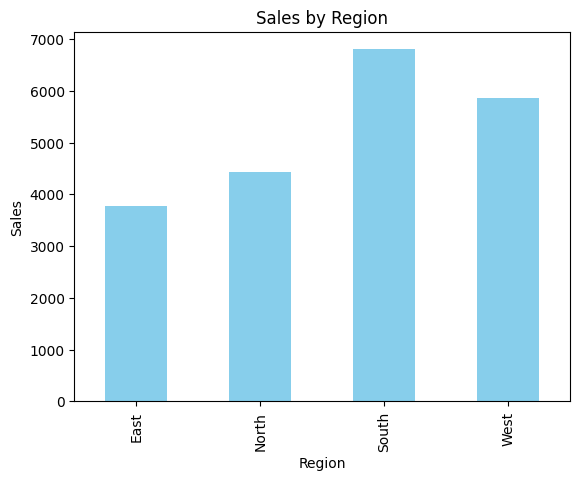

In [9]:
regional_sales.plot(kind='bar',title='Sales by Region',color='skyblue')
plt.ylabel('Sales')
plt.show()

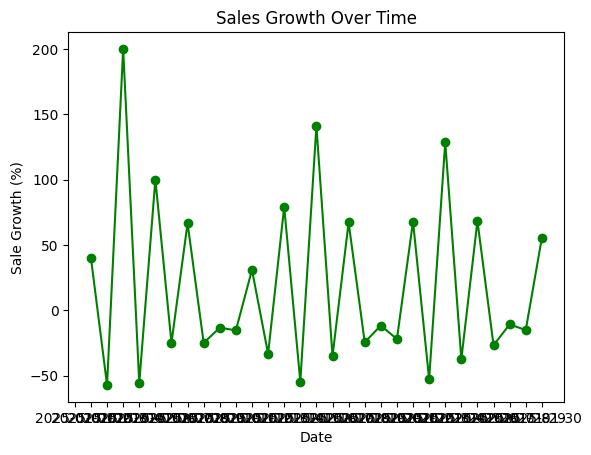

In [10]:
plt.plot(data['Date'],data['Sales Growth'],marker='o',linestyle='-',color='green')
plt.title('Sales Growth Over Time')
plt.xlabel('Date')
plt.ylabel('Sale Growth (%)')
plt.show()

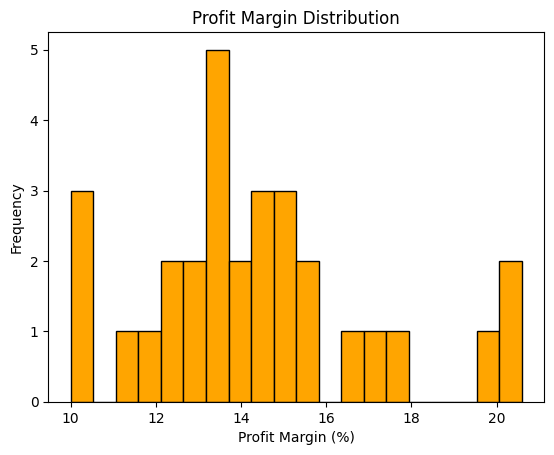

In [11]:
plt.hist(data['Profit'] / data['Sales'] * 100,bins=20, color='orange',edgecolor='black')
plt.title('Profit Margin Distribution')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Frequency')
plt.show()

In [12]:
kpi_summary = {
    'Total Revenue':[total_revenue],
    'Gross Profit Margin (%)':[gross_profit_margin],
    'Average Order Value':[average_order_value],
    'Customer Lifetime Value':[clv]
}

kpi_df = pd.DataFrame(kpi_summary)
kpi_df.to_csv('Kpi_summary.csv',index=False)
print('KPI summary saved to kpi_summary.csv')

KPI summary saved to kpi_summary.csv


In [13]:
total_leads = data['Leads'].sum()
conversion_rate = (total_orders / total_leads) * 100

print(f'Sales Conversion: {conversion_rate:.2f}%')

Sales Conversion: 2.86%


In [14]:
np.random.seed(42)
data['Leads'] = np.random.randint(50,200,size=len(data))

total_leads = data['Leads'].sum()
conversion_rate = (total_orders / total_leads ) * 100

In [15]:
print(f'Simulated Sales Conversion Rate: {conversion_rate}')

Simulated Sales Conversion Rate: 0.8088433540037746


In [16]:
returning_customers = data['CustomerID'].duplicated()
total_customers = data['CustomerID'].nunique()

retention_rate = (returning_customers / total_customers) * 100
print(retention_rate)

#print(f'Customer Retention Rate: {retention_rate:.2f}%')

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
Name: CustomerID, dtype: float64


In [17]:
revenue_per_customer = total_revenue / total_customers
print(f'Revenue Per Customer :${revenue_per_customer:.2f}')

Revenue Per Customer :$695.33


In [18]:
product_profitability = data.groupby('Product')['Profit'].sum().sort_values(ascending=False)
print(product_profitability.head())

Product
ProductG    490
ProductH    428
ProductA    384
ProductC    350
ProductE    335
Name: Profit, dtype: int64


In [19]:
data['Date'] = pd.to_datetime(data['Date'])

monthly_sales = data.groupby(data['Date'].dt.to_period('M'))['Sales'].sum()

c:\Users\francis\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


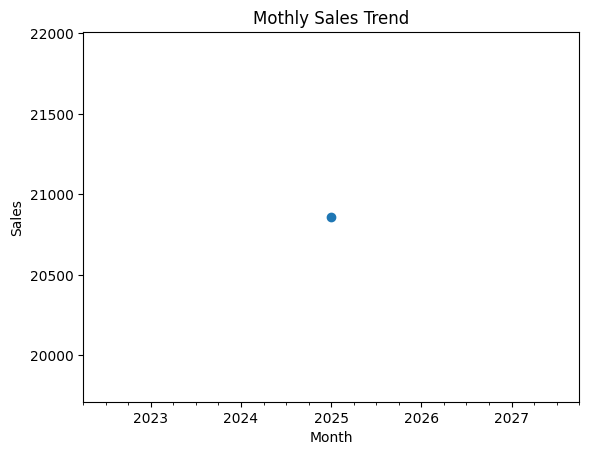

In [20]:
monthly_sales.plot(kind='line',title='Mothly Sales Trend',marker='o')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.show()

Product
ProductA    2990
ProductG    2620
ProductH    2510
ProductB    2420
ProductC    2270
Name: Sales, dtype: int64


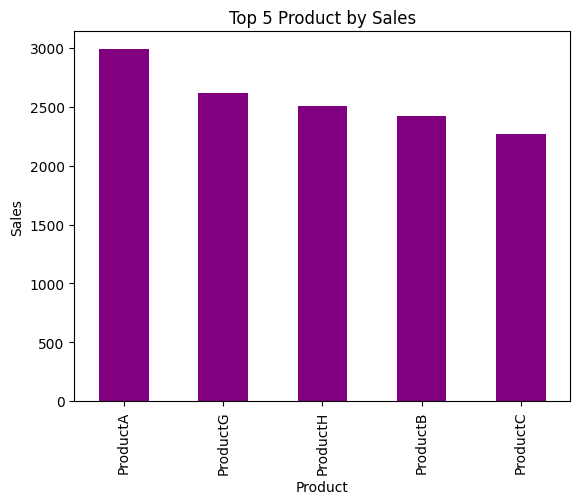

In [21]:
top_products = data.groupby('Product')['Sales'].sum().sort_values(ascending=False).head(5)
print(top_products)


top_products.plot(kind='bar',title='Top 5 Product by Sales',color='purple')
plt.ylabel('Sales')
plt.show()

In [22]:
rfm = data.groupby('CustomerID').agg({
    'Date':lambda x:(data['Date'].max() - x.max()).days,
    'Sales':'count',
    'Profit':'sum'
}).rename(columns={'Date':'Recency','Sales':'Frequency','Profit':'Monetary'})


rfm['RFM_Score'] = rfm['Recency'].rank(ascending=False) + rfm['Frequency'].rank(ascending=True) + rfm['Monetary'].rank(ascending=True)
print(rfm.head())

            Recency  Frequency  Monetary  RFM_Score
CustomerID                                         
1                29          1        50       21.0
2                28          1       100       34.5
3                27          1        30       19.5
4                26          1       150       44.5
5                25          1        40       22.5


In [23]:
data['Date'] = pd.to_datetime(data['Date'])

last_purchase = data.groupby('CustomerID')['Date'].max().reset_index()
last_purchase.rename(columns={'Date':'LastPurchaseDate'},inplace=True)


print(last_purchase.head())

   CustomerID LastPurchaseDate
0           1       2025-01-01
1           2       2025-01-02
2           3       2025-01-03
3           4       2025-01-04
4           5       2025-01-05


In [24]:
data = data.merge(last_purchase,on='CustomerID',how='left')

print(data.head())

        Date  Sales  Profit Region  CustomerID   Product  Leads  Sales Growth  \
0 2025-01-01    500      50  North           1  ProductA    152           NaN   
1 2025-01-02    700     100  South           2  ProductA    142     40.000000   
2 2025-01-03    300      30   East           3  ProductB     64    -57.142857   
3 2025-01-04    900     150   West           4  ProductC    156    200.000000   
4 2025-01-05    400      40  North           5  ProductD    121    -55.555556   

  LastPurchaseDate  
0       2025-01-01  
1       2025-01-02  
2       2025-01-03  
3       2025-01-04  
4       2025-01-05  


In [25]:
data['DaysSinceLastPurchase'] = (data['Date'].max() - data['LastPurchaseDate']).dt.days

print(data[['CustomerID', 'LastPurchaseDate', 'DaysSinceLastPurchase']].head())

   CustomerID LastPurchaseDate  DaysSinceLastPurchase
0           1       2025-01-01                     29
1           2       2025-01-02                     28
2           3       2025-01-03                     27
3           4       2025-01-04                     26
4           5       2025-01-05                     25


In [26]:
print(data.isnull().sum())


data['Sales'] = data['Sales'].fillname(data['Sales'].mean())

data = data.dropna()

Date                     0
Sales                    0
Profit                   0
Region                   0
CustomerID               0
Product                  0
Leads                    0
Sales Growth             1
LastPurchaseDate         0
DaysSinceLastPurchase    0
dtype: int64


AttributeError: 'Series' object has no attribute 'fillname'

In [27]:
high_sales = data[data['Sales'] > 500 ]

print(high_sales.head())

        Date  Sales  Profit Region  CustomerID   Product  Leads  Sales Growth  \
1 2025-01-02    700     100  South           2  ProductA    142     40.000000   
3 2025-01-04    900     150   West           4  ProductC    156    200.000000   
5 2025-01-06    800     120  South           6  ProductE     70    100.000000   
6 2025-01-07    600      80   East           7  ProductF    152    -25.000000   
7 2025-01-08   1000     200   West           8  ProductG    171     66.666667   

  LastPurchaseDate  DaysSinceLastPurchase  
1       2025-01-02                     28  
3       2025-01-04                     26  
5       2025-01-06                     24  
6       2025-01-07                     23  
7       2025-01-08                     22  


In [28]:
numerical_data = data.select_dtypes(include=['float64','int64'])

numerical_data = numerical_data.fillna(0)

correlation = numerical_data.corr()



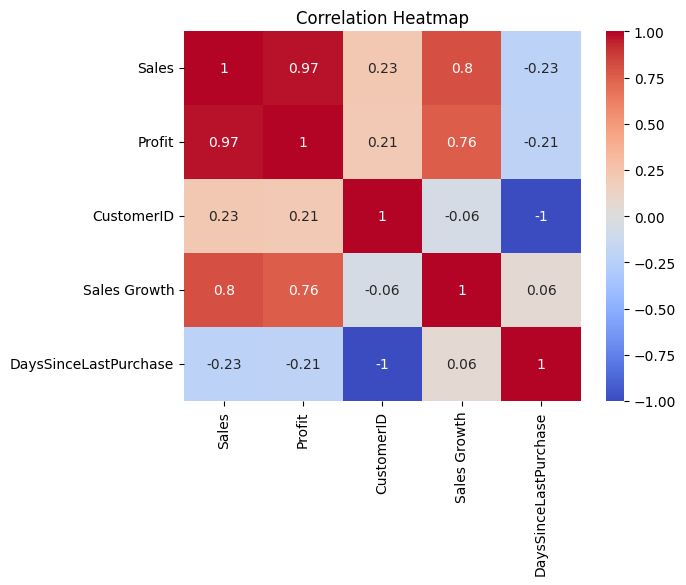

In [29]:



sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()